In [79]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [80]:
data = pd.read_csv("diabetes.csv")
data.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [81]:
data.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [82]:
col_names = ['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']

In [83]:
X = data[col_names]
Y = data['Outcome']

In [84]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [85]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,train_size=0.7, random_state=42, stratify=Y)

In [86]:
model = LogisticRegression()

In [87]:
model.fit(X_train, Y_train)

LogisticRegression()

In [88]:
Y_pred = model.predict(X_test)

In [89]:
print(accuracy_score(Y_pred, Y_test))

0.7445887445887446


In [90]:
print(mean_squared_error(Y_pred, Y_test))

0.2554112554112554


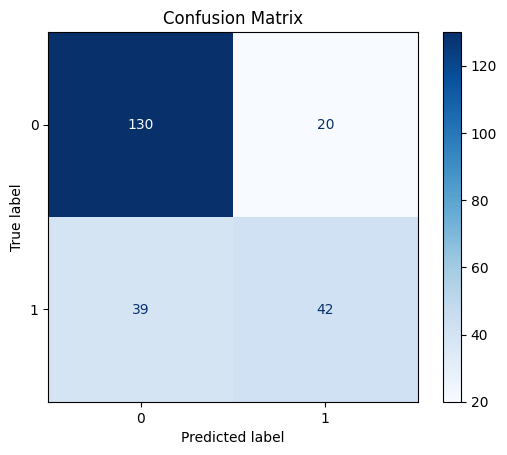

In [91]:
cm = confusion_matrix(Y_test, Y_pred)
# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

#### Taking only one variable in X

In [110]:
X = pd.DataFrame(data['Age'])
Y = pd.DataFrame(data['Outcome'])
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,train_size=0.7, random_state=42, stratify=Y)
model = LogisticRegression()
model.fit(X_train, Y_train)
Y_pred = model.predict(X_test)

In [113]:
print(accuracy_score(Y_pred, Y_test))

0.6406926406926406


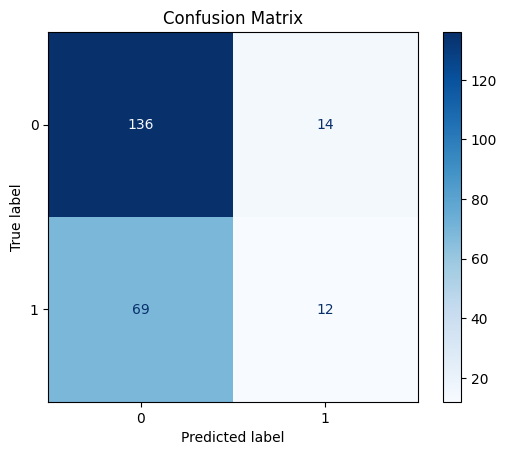

In [114]:
cm = confusion_matrix(Y_test, Y_pred)
# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()